In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


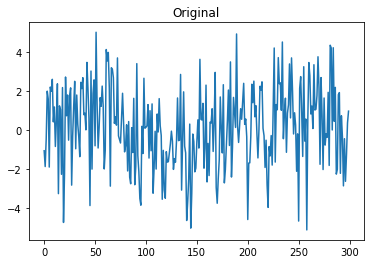

In [6]:
#original sequence is a noisy sine wave
original = np.sin(np.linspace(0, 3*np.pi, 300))
X = 2* np.random.randn(300) + original
plt.plot(X)
plt.title('Original')
plt.show()

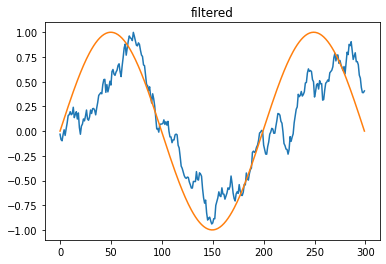

In [9]:
#setup placeholders
decay = tf.placeholder(tf.float32, shape=(), name='decay')
sequence = tf.placeholder(tf.float32, shape=(None,), name='sequence')

#the recurrence function and the loop
def recurrence(last, x): #low-pass filter
    return (1.0-decay)*x + decay*last

lpf = tf.scan(fn=recurrence, elems=sequence, initializer=0.0) #sequence[0] to use the first value of the sequence

#run
with tf.Session() as session:
    Y = session.run(lpf, feed_dict={sequence:X, decay:0.97})
    plt.plot(Y)
    plt.plot(original)
    plt.title('filtered')
    plt.show()